<h1> Income x Education: Texas & Illinois

here I will look into educational attainment and income in both the states of Texas and Illinois (by county).
By Stacy.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


import the texas education dataset

In [2]:
gdf = gpd.read_file('acs2019_5yr_B15002_05000US48191.geojson')

look at the data we will work with 

In [3]:
gdf.head()

,geoid,name,B15002001,"B15002001, Error",B15002002,"B15002002, Error",B15002003,"B15002003, Error",B15002004,"B15002004, Error",...,"B15002031, Error",B15002032,"B15002032, Error",B15002033,"B15002033, Error",B15002034,"B15002034, Error",B15002035,"B15002035, Error",geometry
0,05000US48001,"Anderson County, TX",42073.0,233.0,26707.0,179.0,215.0,83.0,206.0,83.0,...,254.0,1359.0,282.0,660.0,145.0,36.0,32.0,47.0,40.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
1,05000US48003,"Andrews County, TX",10700.0,158.0,5389.0,68.0,157.0,84.0,104.0,76.0,...,145.0,488.0,178.0,202.0,112.0,47.0,67.0,0.0,21.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
2,05000US48005,"Angelina County, TX",57275.0,48.0,27523.0,63.0,666.0,196.0,255.0,115.0,...,388.0,3469.0,392.0,1594.0,288.0,185.0,86.0,71.0,48.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
3,05000US48007,"Aransas County, TX",17878.0,499.0,8572.0,379.0,95.0,68.0,101.0,88.0,...,213.0,1326.0,302.0,513.0,176.0,117.0,103.0,66.0,53.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
4,05000US48009,"Archer County, TX",6137.0,36.0,3000.0,35.0,2.0,3.0,28.0,22.0,...,95.0,560.0,100.0,185.0,61.0,66.0,40.0,20.0,17.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


dropping columns-I create a list of columns that I’ll keep

In [4]:
columns_to_keep = ['geoid',
 'name',
 'B15002001',
 'B15002011',
 'B15002015',
 'B15002028',
 'B15002032',
 'geometry']

 then I reassign this new list to the dataframe, updating it in a sense

In [5]:
gdf = gdf[columns_to_keep]

I then rename the columns into something easier to recall later

In [6]:
gdf.columns= ['geoid',
 'name',
 'Total',
 'males with HS degree',
 'males with BA degree',
 'females with HS degree',
 'females with BA degree',
 'geometry']

now i check to see it has been done

In [7]:
gdf.head()

,geoid,name,Total,males with HS degree,males with BA degree,females with HS degree,females with BA degree,geometry
0,05000US48001,"Anderson County, TX",42073.0,10778.0,1511.0,5583.0,1359.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
1,05000US48003,"Andrews County, TX",10700.0,2136.0,326.0,1603.0,488.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
2,05000US48005,"Angelina County, TX",57275.0,9688.0,2944.0,8390.0,3469.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
3,05000US48007,"Aransas County, TX",17878.0,2590.0,1097.0,2990.0,1326.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
4,05000US48009,"Archer County, TX",6137.0,1188.0,435.0,987.0,560.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


now I normalize the raw data and add colums to my data that give %’s of each education level

In [8]:

gdf['percent males with HS degree'] = gdf['males with HS degree']/gdf['Total']*100
gdf['percent males with BA degree'] = gdf['males with BA degree']/gdf['Total']*100
gdf['percent females with HS degree'] = gdf['females with HS degree']/gdf['Total']*100
gdf['percent females with BA degree'] = gdf['females with BA degree']/gdf['Total']*100

I want to look to have a columns that represents the total amount of HS and BA educated people in a county so I add them to get a total 

In [9]:
gdf['total educated'] = gdf['males with HS degree']+gdf['males with BA degree']+gdf['females with HS degree']+gdf['females with BA degree']

I then normalize that raw data

In [10]:
gdf['percent total educated'] = gdf['total educated']/gdf['Total']*100

check if all of the changes were made 

In [11]:
gdf.head()

,geoid,name,Total,males with HS degree,males with BA degree,females with HS degree,females with BA degree,geometry,percent males with HS degree,percent males with BA degree,percent females with HS degree,percent females with BA degree,total educated,percent total educated
0,05000US48001,"Anderson County, TX",42073.0,10778.0,1511.0,5583.0,1359.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ...",25.617379,3.591377,13.269793,3.230100,19231.0,45.708649
1,05000US48003,"Andrews County, TX",10700.0,2136.0,326.0,1603.0,488.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666...",19.962617,3.046729,14.981308,4.560748,4553.0,42.551402
2,05000US48005,"Angelina County, TX",57275.0,9688.0,2944.0,8390.0,3469.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ...",16.914884,5.140113,14.648625,6.056744,24491.0,42.760367
3,05000US48007,"Aransas County, TX",17878.0,2590.0,1097.0,2990.0,1326.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ...",14.487079,6.136033,16.724466,7.416937,8003.0,44.764515
4,05000US48009,"Archer County, TX",6137.0,1188.0,435.0,987.0,560.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ...",19.357993,7.088154,16.082777,9.124980,3170.0,51.653903


now we plot the percent total educated per county

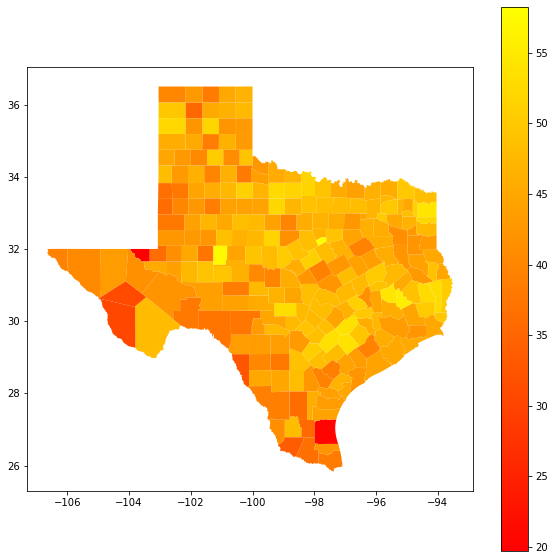

In [12]:
gdf.plot(figsize=(10,10),column ='percent total educated' ,legend=True, cmap='autumn') 


<h1> Repeat

repeat the exact same process but with Illinois

import illinois census data

In [13]:
gdf2 = gpd.read_file('acs2019_5yr_B15002_05000US17181.geojson')

see what data we are working with 

In [14]:
gdf2.head()

,geoid,name,B15002001,"B15002001, Error",B15002002,"B15002002, Error",B15002003,"B15002003, Error",B15002004,"B15002004, Error",...,"B15002031, Error",B15002032,"B15002032, Error",B15002033,"B15002033, Error",B15002034,"B15002034, Error",B15002035,"B15002035, Error",geometry
0,04000US17,Illinois,8686299.0,1166.0,4189131.0,962.0,56037.0,1854.0,23040.0,1171.0,...,3784.0,954818.0,6888.0,492287.0,5054.0,86349.0,2078.0,51569.0,1468.0,"MULTIPOLYGON (((-91.18529 40.63780, -91.17510 ..."
1,05000US17001,"Adams County, IL",46125.0,131.0,22204.0,82.0,160.0,80.0,31.0,37.0,...,258.0,3851.0,354.0,2065.0,262.0,155.0,65.0,85.0,53.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
2,05000US17003,"Alexander County, IL",4497.0,55.0,2085.0,56.0,17.0,14.0,0.0,16.0,...,100.0,236.0,70.0,50.0,35.0,9.0,12.0,0.0,16.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
3,05000US17005,"Bond County, IL",11741.0,300.0,6036.0,287.0,50.0,30.0,0.0,18.0,...,135.0,901.0,161.0,479.0,135.0,12.0,15.0,36.0,35.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
4,05000US17007,"Boone County, IL",35008.0,175.0,17144.0,140.0,311.0,143.0,278.0,172.0,...,292.0,2855.0,394.0,1198.0,236.0,180.0,86.0,105.0,79.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."


this is the only difference from the same coding process and its because the first row will skew the data (because it is of all of Illinois

In [15]:
gdf2 = gdf2.drop([0])

dropping columns-I create a list of columns that I’ll keep

In [16]:
columns_to_keep2 = ['geoid',
 'name',
 'B15002001',
 'B15002011',
 'B15002015',
 'B15002028',
 'B15002032',
 'geometry']

reassing the kept columns as the dataset

In [17]:
gdf2 = gdf2[columns_to_keep]

rename the columns

In [18]:
gdf2.columns= ['geoid',
 'name',
 'Total',
 'males with HS degree',
 'males with BA degree',
 'females with HS degree',
 'females with BA degree',
 'geometry']

check that the data has changed

In [19]:
gdf2.head()

,geoid,name,Total,males with HS degree,males with BA degree,females with HS degree,females with BA degree,geometry
1,05000US17001,"Adams County, IL",46125.0,8333.0,3483.0,8002.0,3851.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
2,05000US17003,"Alexander County, IL",4497.0,858.0,211.0,974.0,236.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
3,05000US17005,"Bond County, IL",11741.0,2207.0,741.0,1681.0,901.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
4,05000US17007,"Boone County, IL",35008.0,6113.0,2168.0,6079.0,2855.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."
5,05000US17009,"Brown County, IL",4863.0,1262.0,242.0,563.0,258.0,"MULTIPOLYGON (((-90.91469 40.01804, -90.91469 ..."


normalize the raw data

In [20]:
gdf2['percent males with HS degree'] = gdf2['males with HS degree']/gdf2['Total']*100
gdf2['percent males with BA degree'] = gdf2['males with BA degree']/gdf2['Total']*100
gdf2['percent females with HS degree'] = gdf2['females with HS degree']/gdf2['Total']*100
gdf2['percent females with BA degree'] = gdf2['females with BA degree']/gdf2['Total']*100

add a column that is the total of educated people

In [21]:
gdf2['total educated'] = gdf2['males with HS degree']+gdf2['males with BA degree']+gdf2['females with HS degree']+gdf2['females with BA degree']

normalize the raw data

In [22]:
gdf2['percent total educated'] = gdf2['total educated']/gdf2['Total']*100

check that the data has been updated

In [23]:
gdf2.head()

,geoid,name,Total,males with HS degree,males with BA degree,females with HS degree,females with BA degree,geometry,percent males with HS degree,percent males with BA degree,percent females with HS degree,percent females with BA degree,total educated,percent total educated
1,05000US17001,"Adams County, IL",46125.0,8333.0,3483.0,8002.0,3851.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ...",18.066125,7.551220,17.348509,8.349051,23669.0,51.314905
2,05000US17003,"Alexander County, IL",4497.0,858.0,211.0,974.0,236.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ...",19.079386,4.692017,21.658884,5.247943,2279.0,50.678230
3,05000US17005,"Bond County, IL",11741.0,2207.0,741.0,1681.0,901.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ...",18.797377,6.311217,14.317349,7.673963,5530.0,47.099906
4,05000US17007,"Boone County, IL",35008.0,6113.0,2168.0,6079.0,2855.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ...",17.461723,6.192870,17.364602,8.155279,17215.0,49.174474
5,05000US17009,"Brown County, IL",4863.0,1262.0,242.0,563.0,258.0,"MULTIPOLYGON (((-90.91469 40.01804, -90.91469 ...",25.951059,4.976352,11.577216,5.305367,2325.0,47.809994


now plot the Percent Educated with a HS &/or BA Degree

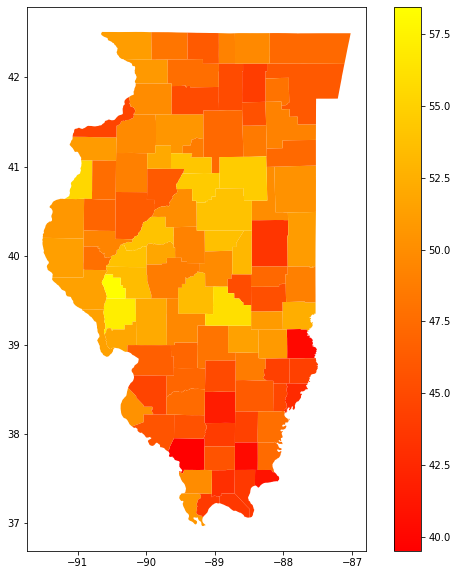

In [24]:
gdf2.plot(figsize=(10,10),column ='percent total educated' ,legend=True, cmap='autumn')

<h1> Income

repeat for both states but now for income

import income data of texas

In [25]:
gdf3 = gpd.read_file('txincome.geojson')

check the data being used

In [26]:
gdf3.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,05000US48001,"Anderson County, TX",16677.0,414.0,861.0,226.0,1302.0,276.0,1259.0,232.0,...,277.0,943.0,203.0,574.0,202.0,411.0,127.0,242.0,83.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
1,05000US48003,"Andrews County, TX",5573.0,191.0,272.0,106.0,188.0,86.0,146.0,85.0,...,238.0,573.0,177.0,473.0,170.0,401.0,141.0,425.0,112.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
2,05000US48005,"Angelina County, TX",31035.0,619.0,2102.0,314.0,1738.0,297.0,1890.0,334.0,...,541.0,2283.0,308.0,1068.0,268.0,1203.0,209.0,688.0,169.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
3,05000US48007,"Aransas County, TX",9548.0,501.0,854.0,290.0,557.0,181.0,450.0,153.0,...,237.0,731.0,178.0,345.0,180.0,379.0,130.0,581.0,209.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
4,05000US48009,"Archer County, TX",3452.0,114.0,158.0,52.0,209.0,88.0,169.0,51.0,...,77.0,359.0,89.0,240.0,62.0,208.0,62.0,207.0,70.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


create a keep list of columns

In [27]:
columns_to_keep3 = ['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

reassign the columns to keen as the main dataframe

In [28]:
gdf3 = gdf3[columns_to_keep3]

check if updated

In [29]:
gdf3.head()

,geoid,name,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017,geometry
0,05000US48001,"Anderson County, TX",16677.0,861.0,1302.0,1259.0,1118.0,897.0,1218.0,1171.0,814.0,734.0,1588.0,1714.0,1831.0,943.0,574.0,411.0,242.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
1,05000US48003,"Andrews County, TX",5573.0,272.0,188.0,146.0,114.0,293.0,212.0,165.0,355.0,125.0,332.0,496.0,1003.0,573.0,473.0,401.0,425.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
2,05000US48005,"Angelina County, TX",31035.0,2102.0,1738.0,1890.0,1915.0,2381.0,1466.0,1336.0,1206.0,1358.0,2980.0,3215.0,4206.0,2283.0,1068.0,1203.0,688.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
3,05000US48007,"Aransas County, TX",9548.0,854.0,557.0,450.0,578.0,666.0,550.0,677.0,425.0,474.0,589.0,707.0,985.0,731.0,345.0,379.0,581.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
4,05000US48009,"Archer County, TX",3452.0,158.0,209.0,169.0,184.0,166.0,196.0,124.0,93.0,125.0,196.0,376.0,442.0,359.0,240.0,208.0,207.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


rename the columns

In [30]:
gdf3.columns = ['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '10,000 to $14,999',
 '15,000 to $19,999',
 '20,000 to $24,999',
 '25,000 to $29,999',
 '30,000 to $34,999',
 '35,000 to $39,999',
               '40,000 to $44,999',
 '45,000 to $49,999',

'50,000 to $59,999',
 '60,000 to $74,999',
 '75,000 to $99,999',
 '100,000 to $124,999',
 '$125,000 to $149,999',
                '150,000 to $199,999',
 '$200,000 or more',
 'geometry']

check that data is updated

In [31]:
gdf3.head()

,geoid,name,Total,"Less than $10,000","10,000 to $14,999","15,000 to $19,999","20,000 to $24,999","25,000 to $29,999","30,000 to $34,999","35,000 to $39,999","40,000 to $44,999","45,000 to $49,999","50,000 to $59,999","60,000 to $74,999","75,000 to $99,999","100,000 to $124,999","$125,000 to $149,999","150,000 to $199,999","$200,000 or more",geometry
0,05000US48001,"Anderson County, TX",16677.0,861.0,1302.0,1259.0,1118.0,897.0,1218.0,1171.0,814.0,734.0,1588.0,1714.0,1831.0,943.0,574.0,411.0,242.0,"MULTIPOLYGON (((-95.67753 32.05163, -95.67360 ..."
1,05000US48003,"Andrews County, TX",5573.0,272.0,188.0,146.0,114.0,293.0,212.0,165.0,355.0,125.0,332.0,496.0,1003.0,573.0,473.0,401.0,425.0,"MULTIPOLYGON (((-102.86649 32.08714, -102.8666..."
2,05000US48005,"Angelina County, TX",31035.0,2102.0,1738.0,1890.0,1915.0,2381.0,1466.0,1336.0,1206.0,1358.0,2980.0,3215.0,4206.0,2283.0,1068.0,1203.0,688.0,"MULTIPOLYGON (((-94.86268 31.23236, -94.86227 ..."
3,05000US48007,"Aransas County, TX",9548.0,854.0,557.0,450.0,578.0,666.0,550.0,677.0,425.0,474.0,589.0,707.0,985.0,731.0,345.0,379.0,581.0,"MULTIPOLYGON (((-97.20401 28.08081, -97.19783 ..."
4,05000US48009,"Archer County, TX",3452.0,158.0,209.0,169.0,184.0,166.0,196.0,124.0,93.0,125.0,196.0,376.0,442.0,359.0,240.0,208.0,207.0,"MULTIPOLYGON (((-98.75200 33.39587, -98.75494 ..."


normalize raw data for each column

In [32]:
gdf3['Percent Less than $10,000'] = gdf3['Less than $10,000']/gdf3['Total']*100
gdf3['Percent 10,000 to $14,999'] = gdf3['10,000 to $14,999']/gdf3['Total']*100
gdf3['Percent 15,000 to $19,999'] = gdf3['15,000 to $19,999']/gdf3['Total']*100
gdf3['Percent 20,000 to $24,999'] = gdf3['20,000 to $24,999']/gdf3['Total']*100 
gdf3['Percent 30,000 to $34,999'] = gdf3['30,000 to $34,999']/gdf3['Total']*100
gdf3['Percent 35,000 to $39,999'] = gdf3['35,000 to $39,999']/gdf3['Total']*100
gdf3['Percent 40,000 to $44,999'] = gdf3['40,000 to $44,999']/gdf3['Total']*100 
gdf3['Percent 45,000 to $49,999'] = gdf3['45,000 to $49,999']/gdf3['Total']*100
gdf3['Percent 50,000 to $59,999'] = gdf3['50,000 to $59,999']/gdf3['Total']*100
gdf3['Percent 60,000 to $74,999'] = gdf3['60,000 to $74,999']/gdf3['Total']*100
gdf3['Percent 75,000 to $99,999'] = gdf3['75,000 to $99,999']/gdf3['Total']*100 
gdf3['Percent 100,000 to $124,999'] = gdf3['100,000 to $124,999']/gdf3['Total']*100
gdf3['Percent $125,000 to $149,999'] = gdf3['$125,000 to $149,999']/gdf3['Total']*100 
gdf3['Percent 150,000 to $199,999'] = gdf3['150,000 to $199,999']/gdf3['Total']*100
gdf3['Percent $200,000 or more'] = gdf3['$200,000 or more']/gdf3['Total']*100

check that data has been updated

In [33]:
gdf3.head()

,geoid,name,Total,"Less than $10,000","10,000 to $14,999","15,000 to $19,999","20,000 to $24,999","25,000 to $29,999","30,000 to $34,999","35,000 to $39,999",...,"Percent 35,000 to $39,999","Percent 40,000 to $44,999","Percent 45,000 to $49,999","Percent 50,000 to $59,999","Percent 60,000 to $74,999","Percent 75,000 to $99,999","Percent 100,000 to $124,999","Percent $125,000 to $149,999","Percent 150,000 to $199,999","Percent $200,000 or more"
0,05000US48001,"Anderson County, TX",16677.0,861.0,1302.0,1259.0,1118.0,897.0,1218.0,1171.0,...,7.021647,4.880974,4.401271,9.522096,10.277628,10.979193,5.654494,3.441866,2.464472,1.451100
1,05000US48003,"Andrews County, TX",5573.0,272.0,188.0,146.0,114.0,293.0,212.0,165.0,...,2.960703,6.369998,2.242957,5.957294,8.900054,17.997488,10.281715,8.487350,7.195406,7.626054
2,05000US48005,"Angelina County, TX",31035.0,2102.0,1738.0,1890.0,1915.0,2381.0,1466.0,1336.0,...,4.304817,3.885935,4.375705,9.602062,10.359272,13.552441,7.356211,3.441276,3.876269,2.216852
3,05000US48007,"Aransas County, TX",9548.0,854.0,557.0,450.0,578.0,666.0,550.0,677.0,...,7.090490,4.451194,4.964390,6.168831,7.404692,10.316297,7.656054,3.613322,3.969418,6.085044
4,05000US48009,"Archer County, TX",3452.0,158.0,209.0,169.0,184.0,166.0,196.0,124.0,...,3.592121,2.694090,3.621089,5.677868,10.892236,12.804171,10.399768,6.952491,6.025492,5.996524


now plot the lowes amount of income 

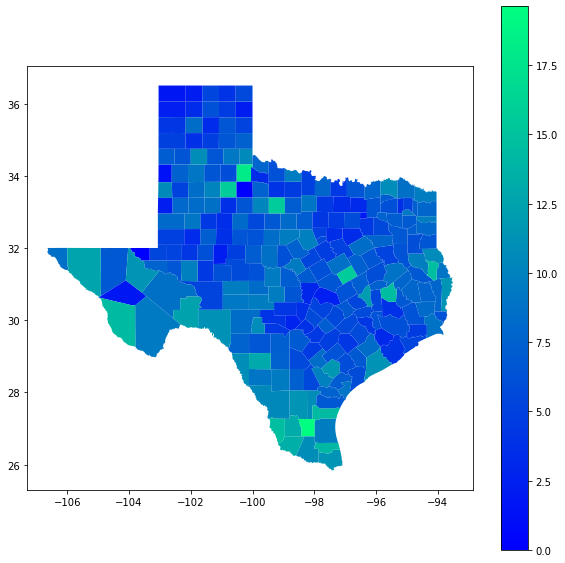

In [34]:
gdf3.plot(figsize=(10,10),column ='Percent Less than $10,000' ,legend=True, cmap='winter') 

now again for illinois

import the illinois income data

In [35]:
gdf4 = gpd.read_file('ilincome.geojson')

check the data I will work with

In [36]:
gdf4.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,04000US17,Illinois,4846134.0,10459.0,302966.0,3949.0,185043.0,2873.0,202275.0,3027.0,...,4983.0,464761.0,4697.0,313318.0,3840.0,360394.0,3979.0,401583.0,4359.0,"MULTIPOLYGON (((-91.18529 40.63780, -91.17510 ..."
1,05000US17001,"Adams County, IL",27112.0,358.0,1547.0,262.0,881.0,182.0,1692.0,263.0,...,326.0,2219.0,250.0,1203.0,210.0,1093.0,174.0,992.0,198.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
2,05000US17003,"Alexander County, IL",2154.0,161.0,240.0,70.0,169.0,63.0,149.0,53.0,...,60.0,52.0,31.0,44.0,27.0,56.0,36.0,9.0,11.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
3,05000US17005,"Bond County, IL",6299.0,360.0,467.0,145.0,277.0,116.0,358.0,133.0,...,176.0,634.0,144.0,306.0,85.0,280.0,85.0,207.0,81.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
4,05000US17007,"Boone County, IL",18571.0,424.0,703.0,234.0,621.0,187.0,531.0,162.0,...,292.0,1962.0,291.0,1441.0,316.0,1143.0,210.0,1356.0,258.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."


create a list of the columns to keep

In [37]:
columns_to_keep4 = ['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

reassign that list to the original dataframe

In [38]:
gdf4 = gdf4[columns_to_keep4]

check if data is updated

In [39]:
gdf4.head()

,geoid,name,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017,geometry
0,04000US17,Illinois,4846134.0,302966.0,185043.0,202275.0,214860.0,199555.0,205949.0,193652.0,196109.0,173996.0,350877.0,458466.0,622330.0,464761.0,313318.0,360394.0,401583.0,"MULTIPOLYGON (((-91.18529 40.63780, -91.17510 ..."
1,05000US17001,"Adams County, IL",27112.0,1547.0,881.0,1692.0,1276.0,1518.0,1511.0,1674.0,1331.0,1188.0,2446.0,2965.0,3576.0,2219.0,1203.0,1093.0,992.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
2,05000US17003,"Alexander County, IL",2154.0,240.0,169.0,149.0,182.0,166.0,119.0,131.0,142.0,94.0,255.0,144.0,202.0,52.0,44.0,56.0,9.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
3,05000US17005,"Bond County, IL",6299.0,467.0,277.0,358.0,298.0,232.0,178.0,279.0,262.0,332.0,579.0,569.0,1041.0,634.0,306.0,280.0,207.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
4,05000US17007,"Boone County, IL",18571.0,703.0,621.0,531.0,988.0,857.0,975.0,592.0,708.0,662.0,1505.0,2093.0,2434.0,1962.0,1441.0,1143.0,1356.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."


rename the columns

In [40]:
gdf4.columns = ['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '10,000 to $14,999',
 '15,000 to $19,999',
 '20,000 to $24,999',
 '25,000 to $29,999',
 '30,000 to $34,999',
 '35,000 to $39,999',
               '40,000 to $44,999',
 '45,000 to $49,999',

'50,000 to $59,999',
 '60,000 to $74,999',
 '75,000 to $99,999',
 '100,000 to $124,999',
 '$125,000 to $149,999',
                '150,000 to $199,999',
 '$200,000 or more',
 'geometry']

check if updated

In [41]:
gdf4.head()

,geoid,name,Total,"Less than $10,000","10,000 to $14,999","15,000 to $19,999","20,000 to $24,999","25,000 to $29,999","30,000 to $34,999","35,000 to $39,999","40,000 to $44,999","45,000 to $49,999","50,000 to $59,999","60,000 to $74,999","75,000 to $99,999","100,000 to $124,999","$125,000 to $149,999","150,000 to $199,999","$200,000 or more",geometry
0,04000US17,Illinois,4846134.0,302966.0,185043.0,202275.0,214860.0,199555.0,205949.0,193652.0,196109.0,173996.0,350877.0,458466.0,622330.0,464761.0,313318.0,360394.0,401583.0,"MULTIPOLYGON (((-91.18529 40.63780, -91.17510 ..."
1,05000US17001,"Adams County, IL",27112.0,1547.0,881.0,1692.0,1276.0,1518.0,1511.0,1674.0,1331.0,1188.0,2446.0,2965.0,3576.0,2219.0,1203.0,1093.0,992.0,"MULTIPOLYGON (((-91.42411 39.93575, -91.42464 ..."
2,05000US17003,"Alexander County, IL",2154.0,240.0,169.0,149.0,182.0,166.0,119.0,131.0,142.0,94.0,255.0,144.0,202.0,52.0,44.0,56.0,9.0,"MULTIPOLYGON (((-89.19975 37.08887, -89.19963 ..."
3,05000US17005,"Bond County, IL",6299.0,467.0,277.0,358.0,298.0,232.0,178.0,279.0,262.0,332.0,579.0,569.0,1041.0,634.0,306.0,280.0,207.0,"MULTIPOLYGON (((-89.36179 39.02772, -89.35987 ..."
4,05000US17007,"Boone County, IL",18571.0,703.0,621.0,531.0,988.0,857.0,975.0,592.0,708.0,662.0,1505.0,2093.0,2434.0,1962.0,1441.0,1143.0,1356.0,"MULTIPOLYGON (((-88.94075 42.41387, -88.94074 ..."


normalize the raw data

In [42]:
gdf4['Percent Less than $10,000'] = gdf4['Less than $10,000']/gdf4['Total']*100
gdf4['Percent 10,000 to $14,999'] = gdf4['10,000 to $14,999']/gdf4['Total']*100
gdf4['Percent 15,000 to $19,999'] = gdf4['15,000 to $19,999']/gdf4['Total']*100
gdf4['Percent 20,000 to $24,999'] = gdf4['20,000 to $24,999']/gdf4['Total']*100 
gdf4['Percent 30,000 to $34,999'] = gdf4['30,000 to $34,999']/gdf4['Total']*100
gdf4['Percent 35,000 to $39,999'] = gdf4['35,000 to $39,999']/gdf4['Total']*100
gdf4['Percent 40,000 to $44,999'] = gdf4['40,000 to $44,999']/gdf4['Total']*100 
gdf4['Percent 45,000 to $49,999'] = gdf4['45,000 to $49,999']/gdf4['Total']*100
gdf4['Percent 50,000 to $59,999'] = gdf4['50,000 to $59,999']/gdf4['Total']*100
gdf4['Percent 60,000 to $74,999'] = gdf4['60,000 to $74,999']/gdf4['Total']*100
gdf4['Percent 75,000 to $99,999'] = gdf4['75,000 to $99,999']/gdf4['Total']*100 
gdf4['Percent 100,000 to $124,999'] = gdf4['100,000 to $124,999']/gdf4['Total']*100
gdf4['Percent $125,000 to $149,999'] = gdf4['$125,000 to $149,999']/gdf4['Total']*100 
gdf4['Percent 150,000 to $199,999'] = gdf4['150,000 to $199,999']/gdf4['Total']*100
gdf4['Percent $200,000 or more'] = gdf4['$200,000 or more']/gdf4['Total']*100

check if done

In [43]:
gdf4.head()

,geoid,name,Total,"Less than $10,000","10,000 to $14,999","15,000 to $19,999","20,000 to $24,999","25,000 to $29,999","30,000 to $34,999","35,000 to $39,999",...,"Percent 35,000 to $39,999","Percent 40,000 to $44,999","Percent 45,000 to $49,999","Percent 50,000 to $59,999","Percent 60,000 to $74,999","Percent 75,000 to $99,999","Percent 100,000 to $124,999","Percent $125,000 to $149,999","Percent 150,000 to $199,999","Percent $200,000 or more"
0,04000US17,Illinois,4846134.0,302966.0,185043.0,202275.0,214860.0,199555.0,205949.0,193652.0,...,3.996010,4.046710,3.590408,7.240349,9.460448,12.841783,9.590346,6.465319,7.436732,8.286667
1,05000US17001,"Adams County, IL",27112.0,1547.0,881.0,1692.0,1276.0,1518.0,1511.0,1674.0,...,6.174388,4.909265,4.381824,9.021835,10.936117,13.189731,8.184568,4.437150,4.031425,3.658896
2,05000US17003,"Alexander County, IL",2154.0,240.0,169.0,149.0,182.0,166.0,119.0,131.0,...,6.081708,6.592386,4.363974,11.838440,6.685237,9.377902,2.414113,2.042711,2.599814,0.417827
3,05000US17005,"Bond County, IL",6299.0,467.0,277.0,358.0,298.0,232.0,178.0,279.0,...,4.429274,4.159390,5.270678,9.191935,9.033180,16.526433,10.065090,4.857914,4.445150,3.286236
4,05000US17007,"Boone County, IL",18571.0,703.0,621.0,531.0,988.0,857.0,975.0,592.0,...,3.187766,3.812396,3.564698,8.104033,11.270260,13.106456,10.564859,7.759410,6.154757,7.301707


now plot the counties with Percent Less than $10,000

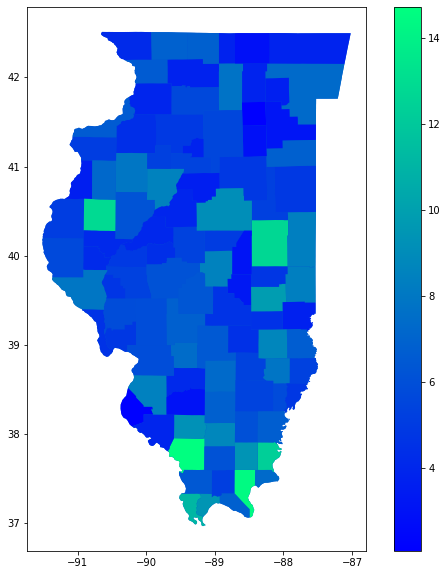

In [44]:
gdf4.plot(figsize=(10,10),column ='Percent Less than $10,000' ,legend=True, cmap='winter') 

<h1> Now to make better data viz!

now here I am using the .subplots command to create multiple plots for the texas graphs. I add argument to clarify that I will want one row of two plots (so they're side by side). I also set the figure's size. I then name each subplot (ex: ax1). for the first map, and set additional arguments to make it in shades of blue, in quantiles, and have a legend. I also make sure to name that plot. I do the same for the second plot and that I title it too. I have to make sure i also assign the map to the correct subplot by making ax = ax1.


Text(0.5, 1.0, 'Texas: Percent $200,000 or more')

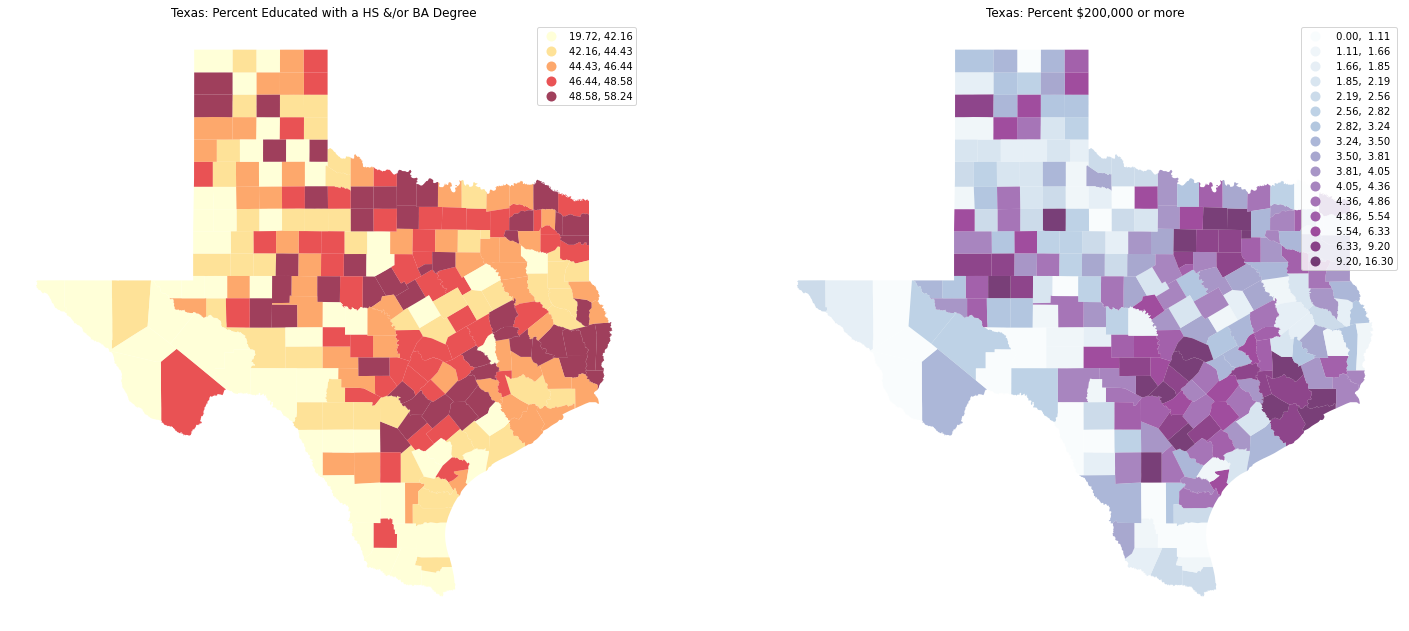

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(25, 25))
ax1, ax2 = axs

gdf.plot(column='percent total educated', 
            cmap='YlOrRd', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Texas: Percent Educated with a HS &/or BA Degree")


gdf3.plot(column='Percent $200,000 or more', 
            cmap='BuPu', 
            scheme='quantiles',
            k=16, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Texas: Percent $200,000 or more")

Given that Texas' income map is for the percent of people that earn 200,000 or more, we can discern the low income areas in the the "0.00 - 1.11" percent of people, where as the the areas that have more livable incomes of the middle and upper class are slightly more purple. When comparing the income map to that of educational attainments of a highschool and bachelors degree, you notice that there are lower incomes in areas that are also inhabited by a lower percentage of education. The opposite is also observable, areas with a higher percentage of educational attainment are also areas in which there are a denser percent of people that make 200,000 or more. It should also come as no surprise that the large cities of San Antonio and Huston have a high concentration of both. They both also demonstrate how wide spread low education levels are on the stretching from El Paso down toward Pharr.

same thing as the texas subplots but with illinois

Text(0.5, 1.0, 'Illinois: Percent $200,000 or more')

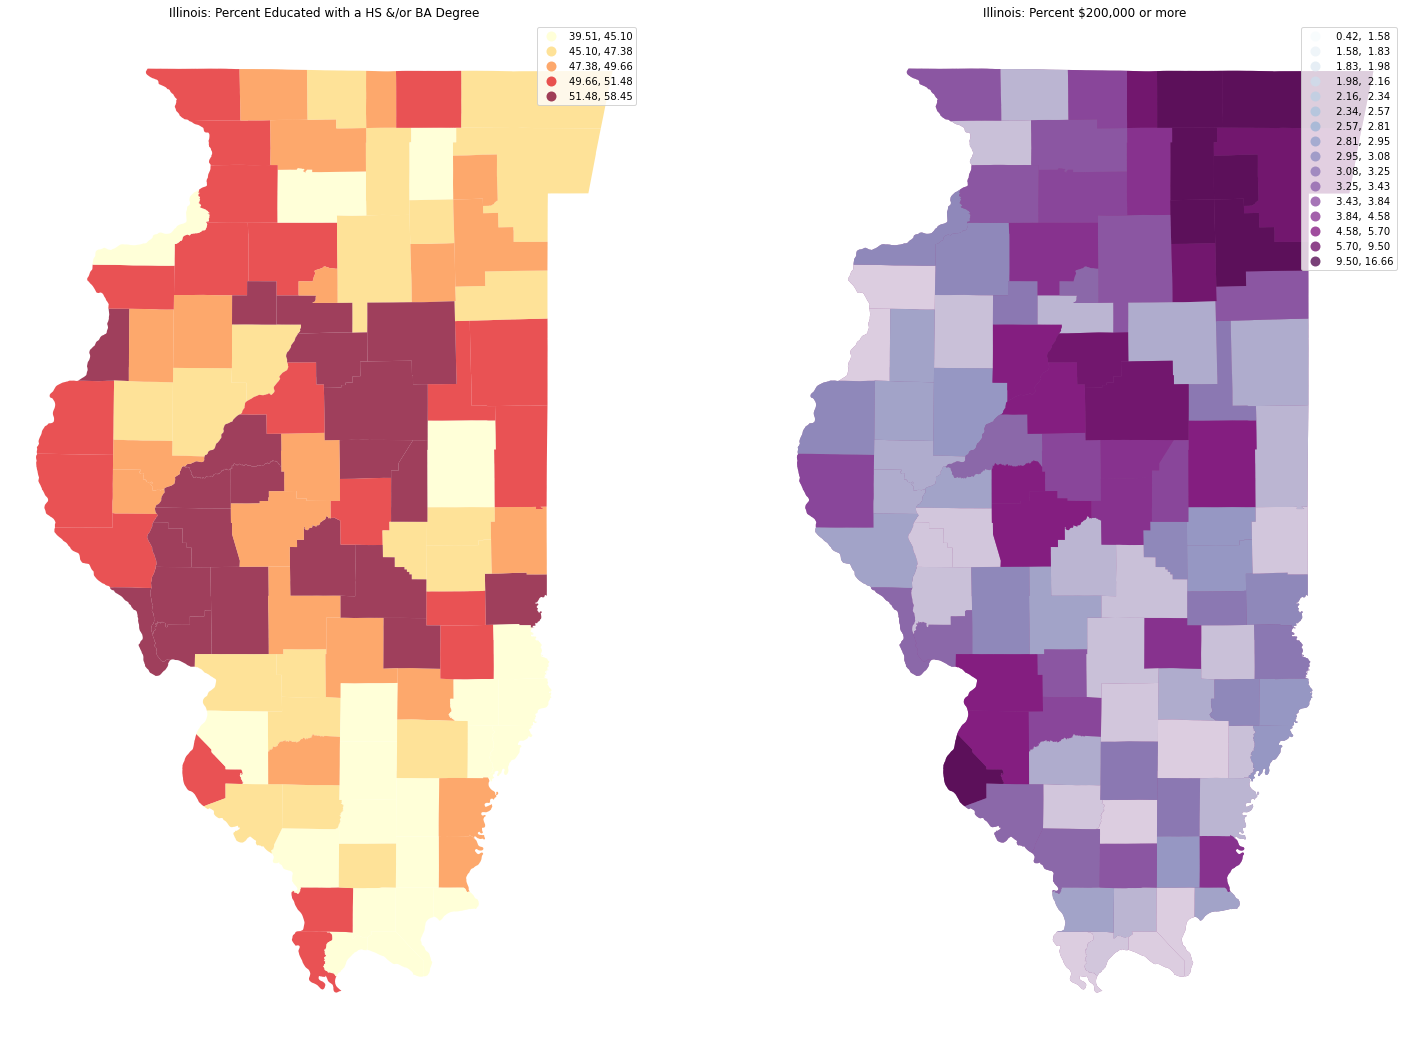

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(25, 25))
ax1, ax2 = axs

gdf2.plot(column='percent total educated', 
            cmap='YlOrRd', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Illinois: Percent Educated with a HS &/or BA Degree")


gdf4.plot(column='Percent $200,000 or more', 
            cmap='BuPu', 
            scheme='quantiles',
            k=16, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Illinois: Percent $200,000 or more")

here you can notice much of the same, you notice that there are lower incomes in areas that are also inhabited by a lower percentage of educational attainment. The opposite is also observable, areas with a higher percentage of educational attainment are also areas in which there are a denser percent of people that make 200,000 or more. Interestingly enough, there are not counties that are not inhabited by people 200,000 or more, indicating they are rather spread out, and lack areas that are in the lowest percentile. 